In [ ]:
!pip install tflite-model-maker

In [ ]:
import os, shutil, zipfile
import tensorflow as tf
from tflite_model_maker import image_classifier
from tflite_model_maker import model_spec
from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker.config import ExportFormat
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

In [ ]:
BASE_DIR = '/content'
os.chdir(BASE_DIR)

In [ ]:
dataset_zip_path = os.path.join(BASE_DIR, 'dataset.zip')
if not os.path.exists(dataset_zip_path):
  !wget --no-check-certificate --content-disposition https://github.com/anandawira/bangkit/releases/download/1.1/dataset.zip
else:
  print("Dataset already downloaded")

Dataset already downloaded


In [ ]:
dataset_dir = os.path.join(BASE_DIR, 'dataset')
if os.path.exists(dataset_dir):
  shutil.rmtree(dataset_dir)

os.makedirs(dataset_dir)

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
  zip_ref.extractall(dataset_dir)

In [ ]:
for dir in os.listdir(dataset_dir):
  class_dir = os.path.join(dataset_dir, dir)
  print('total training images for', dir, 'is', len(os.listdir(class_dir)))

total training images for gwk is 239
total training images for surabaya is 222
total training images for besakih is 231
total training images for jamgadang is 123
total training images for borobudur is 152


In [ ]:
data = DataLoader.from_folder(dataset_dir)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 967, num_label: 5, labels: besakih, borobudur, gwk, jamgadang, surabaya.


INFO:tensorflow:Load image with size: 967, num_label: 5, labels: besakih, borobudur, gwk, jamgadang, surabaya.


In [ ]:
model = image_classifier.create(train_data, epochs=150, shuffle=True)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/150


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


27/27 [==============================] - 8s 202ms/step - loss: 0.9638 - accuracy: 0.7315
Epoch 2/150
27/27 [==============================] - 5s 196ms/step - loss: 0.5688 - accuracy: 0.9502
Epoch 3/150
27/27 [==============================] - 5s 197ms/step - loss: 0.5268 - accuracy: 0.9664
Epoch 4/150
27/27 [==============================] - 5s 195ms/step - loss: 0.5097 - accuracy: 0.9745
Epoch 5/150
27/27 [==============================] - 5s 198ms/step - loss: 0.4865 - accuracy: 0.9850
Epoch 6/150
27/27 [==============================] - 5s 195ms/step - loss: 0.4819 - accuracy: 0.9850
Epoch 7/150
27/27 [==============================] - 5s 196ms/step - loss: 0.4785 - accuracy: 0.9838
Epoch 8/150
27/27 [==============================] - 5s 195ms/step - loss: 0.4710 - accuracy: 0.9907
Epoch 9/150
27/27 [==============================] - 5s 195ms/step - loss: 0.4626 - accuracy: 0.9931
Epoch 10/150
27/27 [==============================] - 5s 198ms/step - loss: 0.4629 - accuracy: 0.9931
E

In [ ]:
loss, accuracy = model.evaluate(test_data)

4/4 [==============================] - 2s 239ms/step - loss: 0.4744 - accuracy: 0.9897


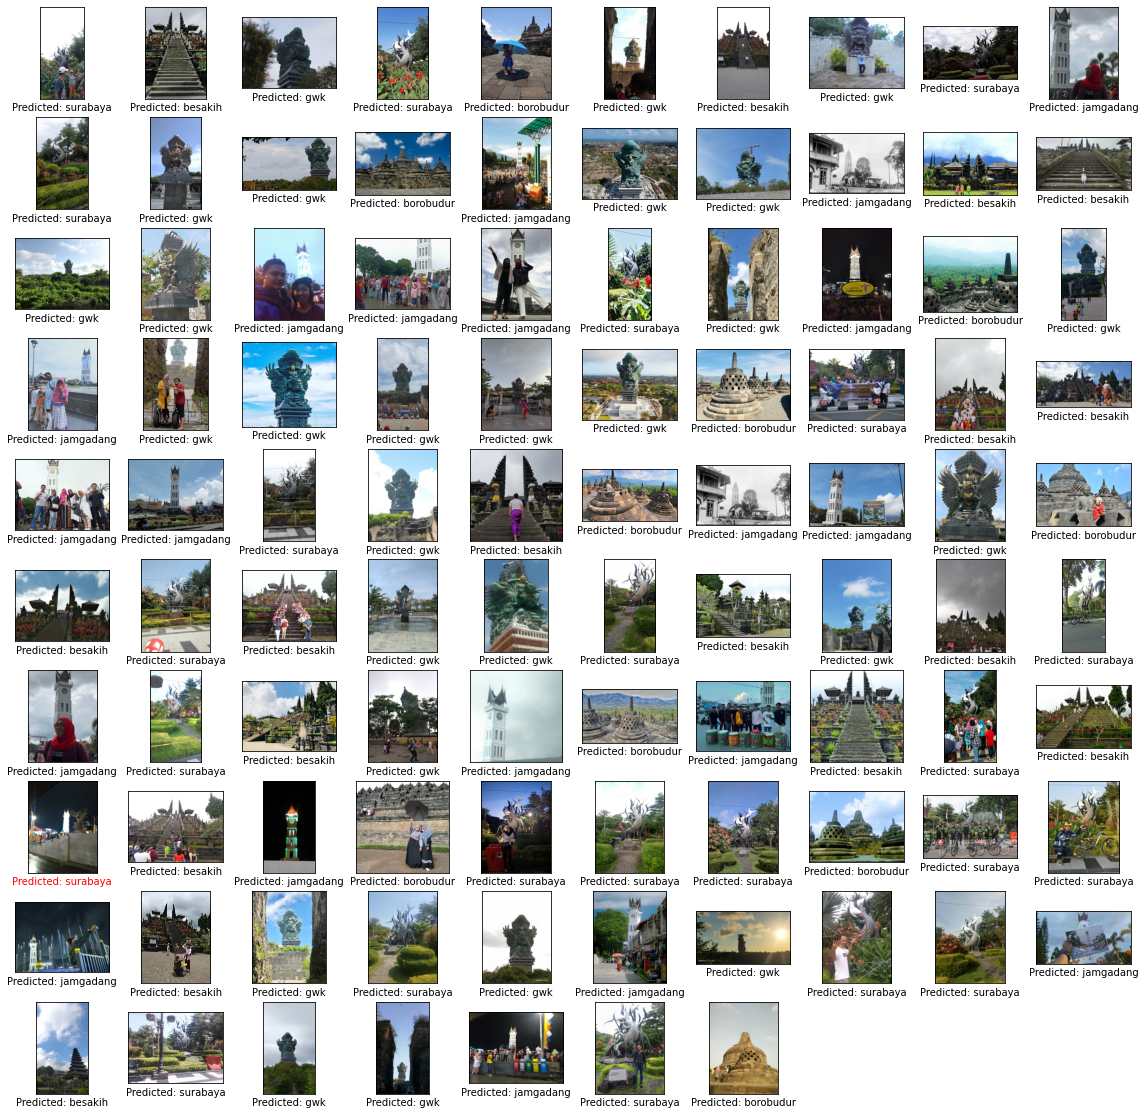

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export('tflite')

INFO:tensorflow:Assets written to: /tmp/tmpd515l1qc/assets


INFO:tensorflow:Assets written to: /tmp/tmpd515l1qc/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp8mvo34b5/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp8mvo34b5/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: tflite/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: tflite/model.tflite


In [ ]:
model.export('label', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in label/labels.txt


INFO:tensorflow:Saving labels in label/labels.txt
